In [11]:
from utils import IMDB_scraper
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

In [12]:
import sys
sys.argv=['']
del sys

In [23]:
def get_df():
    obj = IMDB_scraper()
    IMDB_scraper.scraping_info(obj)
    df = obj.df
    return df

df = get_df()
df = df.astype({'Rating': 'float32'})

In [24]:
%matplotlib inline
rcParams['figure.figsize'] = 20, 10

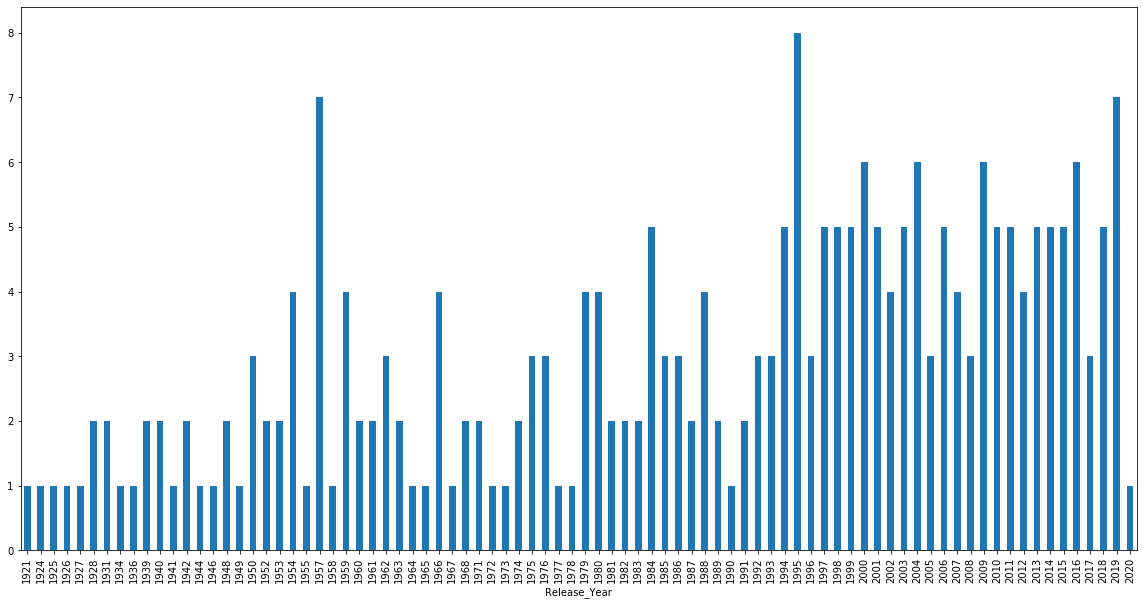

In [25]:
# Count of how many movies in the top 250 from a specific year
df_year_groups = df.groupby(by='Release_Year')
df_year_groups.count()['Rating'].plot.bar()

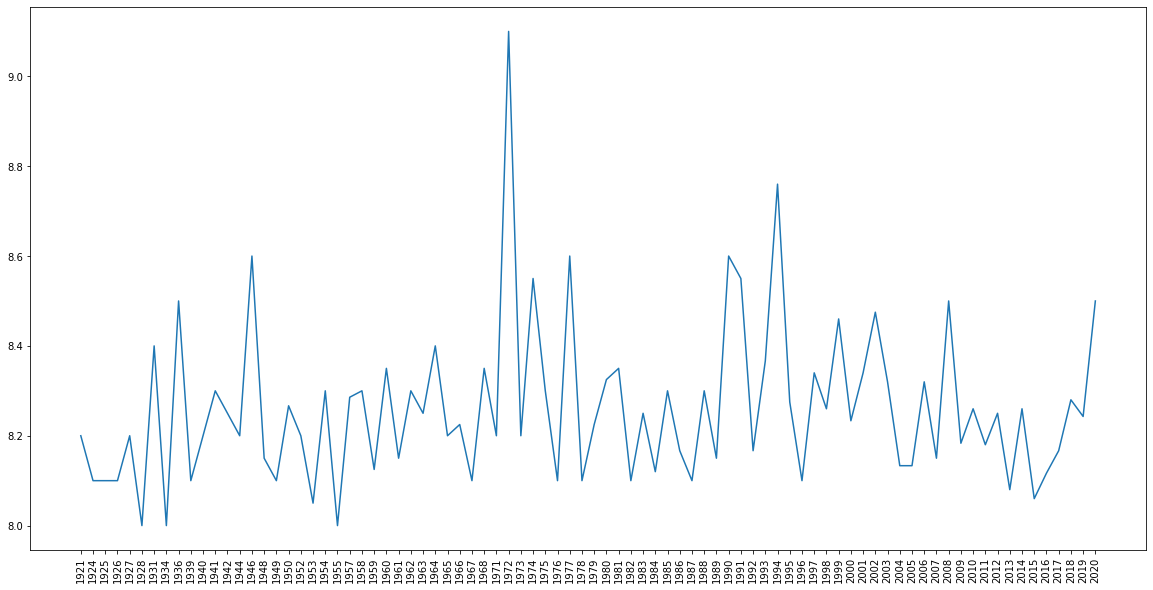

In [26]:
# Average rating in movies from specific year
fig, ax = plt.subplots()
ax.plot(df_year_groups.mean()['Rating'])
plt.setp(ax.get_xticklabels(), rotation = 90)

plt.show()

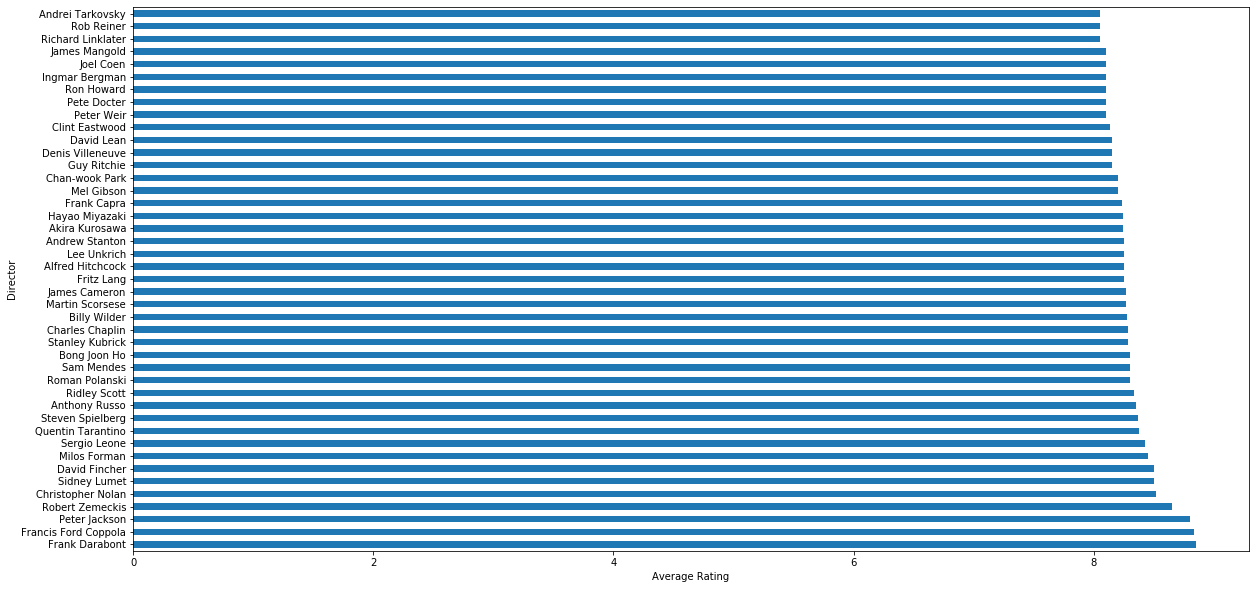

In [27]:
mask = df.Director.duplicated(keep=False)
df_filtered_directors = df[mask]
df_director_mean = df_filtered_directors.groupby('Director').Rating.mean()
df_director_mean.sort_values(ascending = False, inplace=True)

df_director_mean.plot.barh()
plt.xlabel('Average Rating')
plt.show()